In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Data = pd.read_csv("Spotify.csv", sep = ';')

In [2]:
print(Data, sep = ';')

        Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                 WHERE SHE GOES                   Bad Bunny   
3          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
4          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
...      ...                            ...                         ...   
651931   197                        Oh Lord                   MiC LOWRY   
651932   198  Superstition - Single Version               Stevie Wonder   
651933   199                        Secrets                  The Weeknd   
651934   200                Ni**as In Paris           JAY-Z, Kanye West   
651935   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023

In [3]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,651936.0,100.407782,57.406664,1.000,51.000,100.000,150.000,200.000
Danceability,651936.0,0.697730,0.133186,0.073,0.617,0.719,0.793,0.985
Energy,651936.0,0.652049,0.155684,0.005,0.549,0.671,0.771,0.996
Loudness,651936.0,-5295.645217,2785.261321,-34475.000,-6825.000,-5206.000,-3885.000,1509.000
Speechiness,651936.0,0.109946,0.096841,0.022,0.045,0.068,0.136,0.966
Acousticness,651936.0,0.230694,0.230710,0.000,0.048,0.152,0.349,0.994
Instrumentalness,651936.0,0.007647,0.054724,0.000,0.000,0.000,0.000,0.956
Valence,651936.0,0.523134,0.223926,0.026,0.356,0.521,0.696,0.982
Points (Total),651936.0,100.592218,57.406664,1.000,51.000,101.000,150.000,200.000
Points (Ind for each Artist/Nat),651936.0,72.391141,54.227892,0.200,28.000,60.000,104.000,200.000


/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


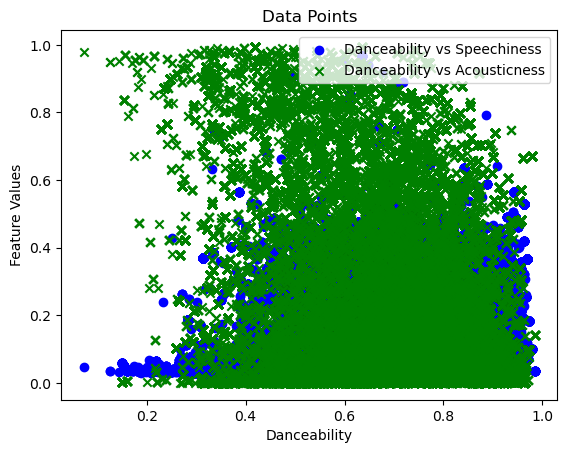

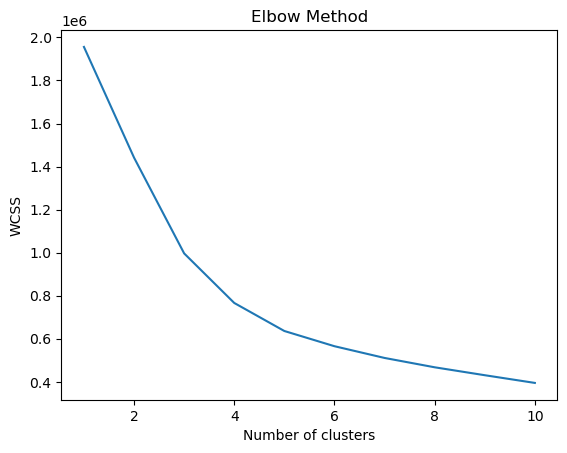

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


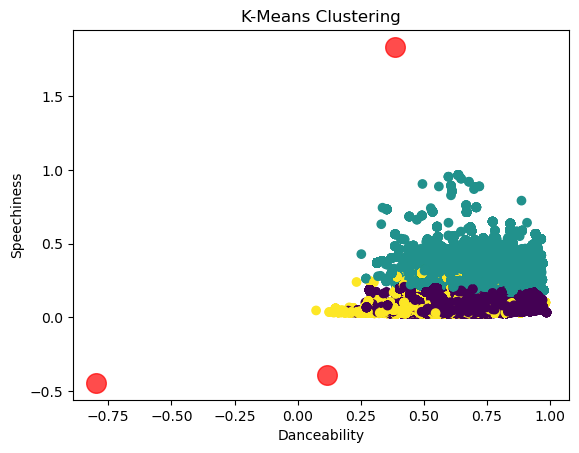

In [4]:
selected_features = Data[['Danceability', 'Speechiness', 'Acousticness']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)


plt.scatter(selected_features['Danceability'], selected_features['Speechiness'], c='b', marker='o', label='Danceability vs Speechiness')
plt.scatter(selected_features['Danceability'], selected_features['Acousticness'], c='g', marker='x', label='Danceability vs Acousticness')
plt.xlabel('Danceability')
plt.ylabel('Feature Values')
plt.legend()
plt.title('Data Points')
plt.show()


wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


n_clusters = 3 


kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_


plt.scatter(selected_features['Danceability'], selected_features['Speechiness'], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.7)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.title('K-Means Clustering')
plt.show()

        Danceability         Energy      Loudness    Speechiness  \
count  651936.000000  651936.000000  6.519360e+05  651936.000000   
mean        0.697730       0.652049 -4.912817e-16       0.109946   
std         0.133186       0.155684  1.000001e+00       0.096841   
min         0.073000       0.005000 -1.047635e+01       0.022000   
25%         0.617000       0.549000 -5.490889e-01       0.045000   
50%         0.719000       0.671000  3.218559e-02       0.068000   
75%         0.793000       0.771000  5.064682e-01       0.136000   
max         0.985000       0.996000  2.443092e+00       0.966000   

        Acousticness  Instrumentalness        Valence  
count  651936.000000     651936.000000  651936.000000  
mean        0.230694          0.007647       0.523134  
std         0.230710          0.054724       0.223926  
min         0.000000          0.000000       0.026000  
25%         0.048000          0.000000       0.356000  
50%         0.152000          0.000000       0.5210

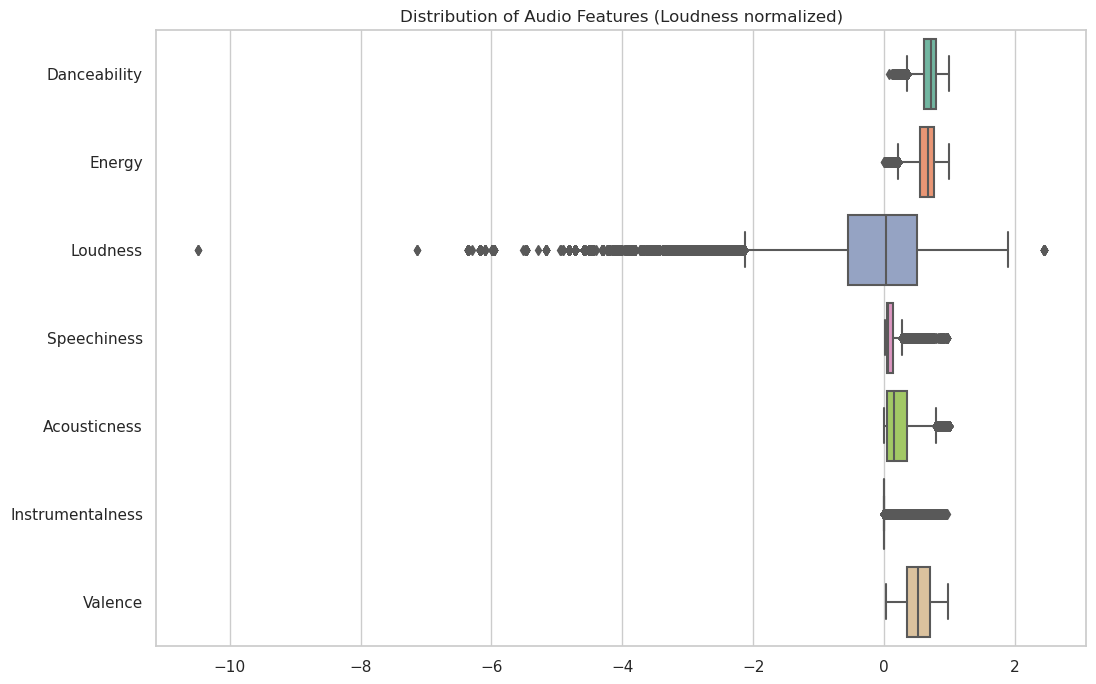

In [7]:
file_path = 'spotify_data.csv'  
df = pd.read_csv("Spotify.csv", sep = ';')

loudness_scaler = StandardScaler()
df['Loudness'] = loudness_scaler.fit_transform(df[['Loudness']])


print(df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']].describe())


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']], orient="h", palette="Set2")
plt.title("Distribution of Audio Features (Loudness normalized)")
plt.show()

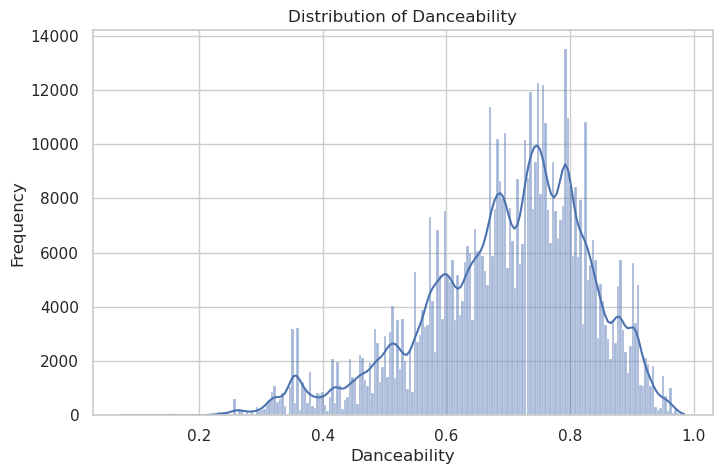

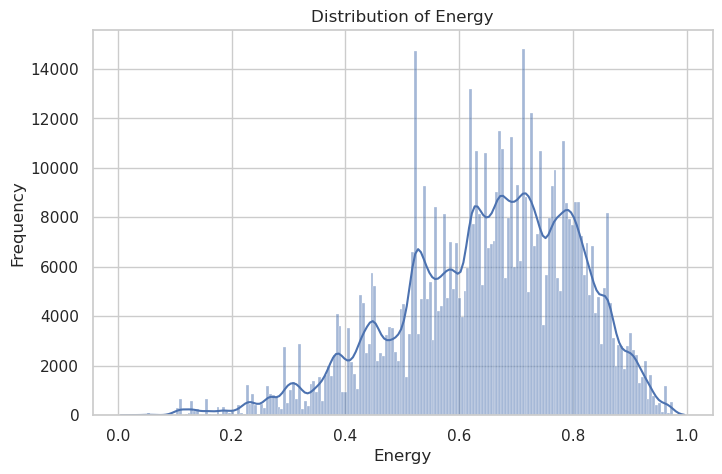

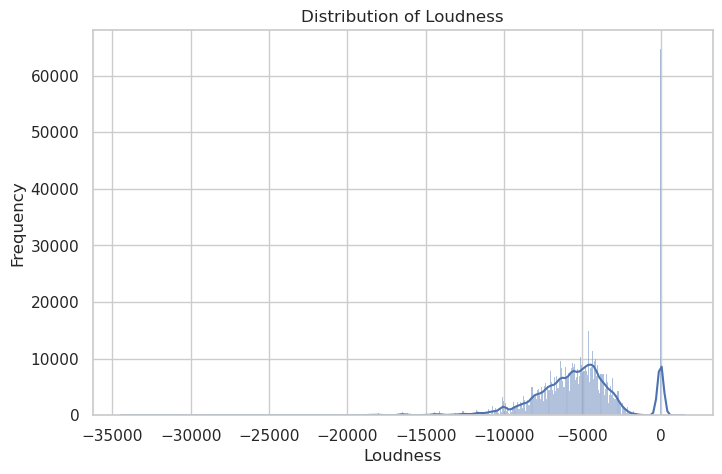

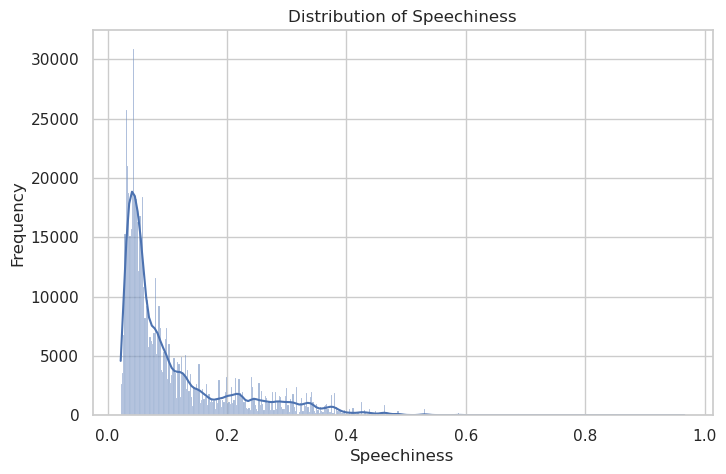

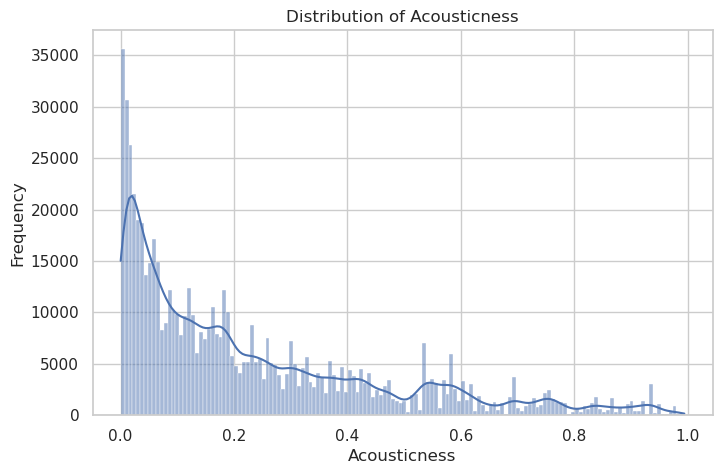

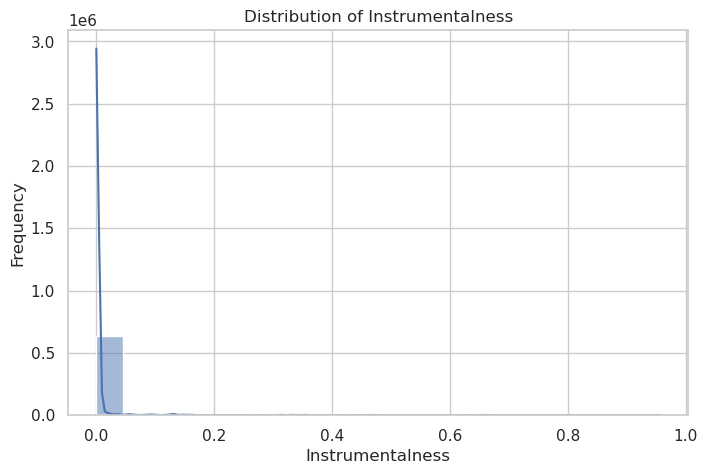

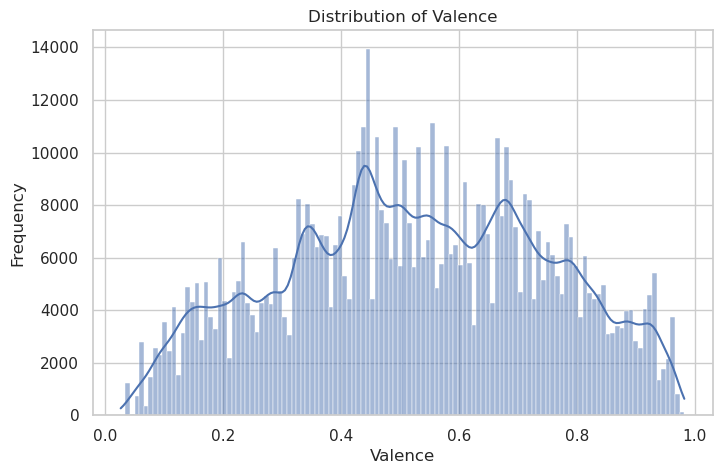

In [8]:
feature_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
feature_stats = Data[feature_columns].describe()


for feature in feature_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(Data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show
    

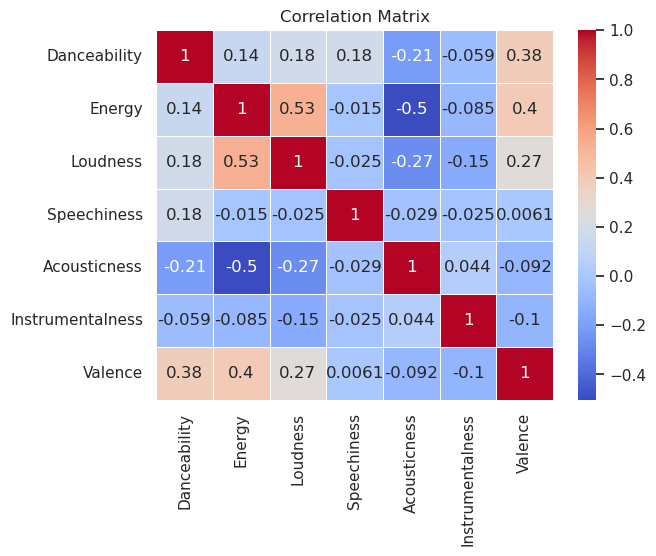

In [9]:
correlation_matrix = Data[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

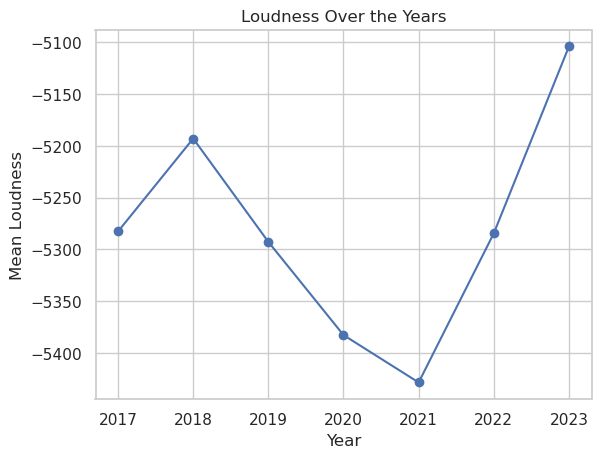

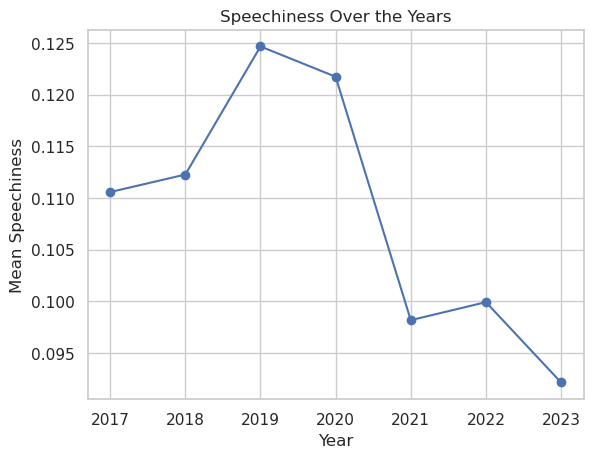

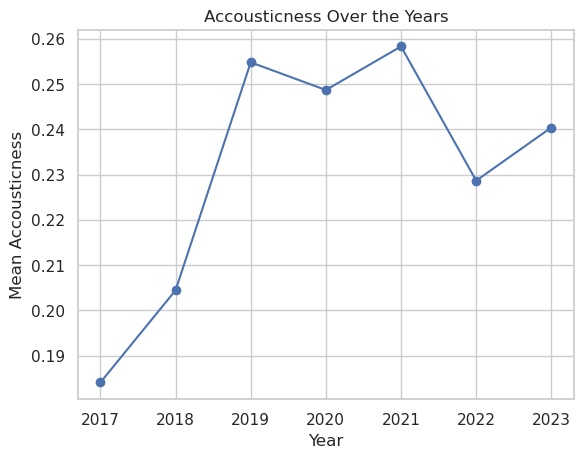

In [11]:
Data['Date'] = pd.to_datetime(Data['Date'])

yearly_loudness = Data.groupby(Data['Date'].dt.year)['Loudness'].mean()

yearly_loudness.plot(kind='line', marker='o')
plt.title('Loudness Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Loudness')
plt.show()

Data['Date'] = pd.to_datetime(Data['Date'])

yearly_loudness = Data.groupby(Data['Date'].dt.year)['Speechiness'].mean()

yearly_loudness.plot(kind='line', marker='o')
plt.title('Speechiness Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Speechiness')
plt.show()

Data['Date'] = pd.to_datetime(Data['Date'])

yearly_loudness = Data.groupby(Data['Date'].dt.year)['Acousticness'].mean()


yearly_loudness.plot(kind='line', marker='o')
plt.title('Accousticness Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Accousticness')
plt.show()

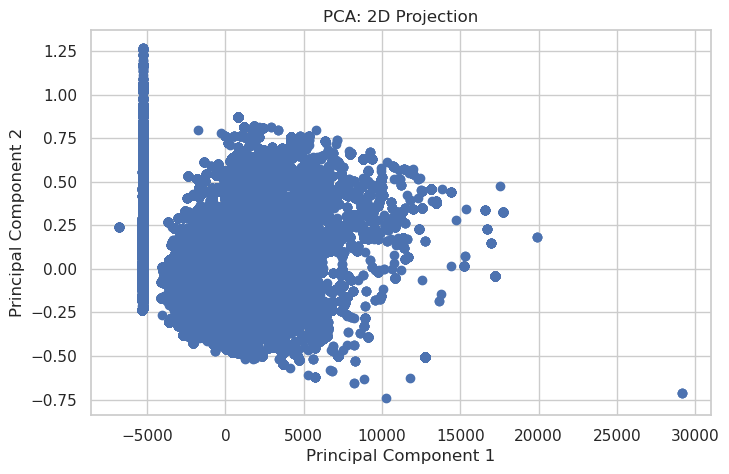

In [12]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Data[feature_columns])

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA: 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

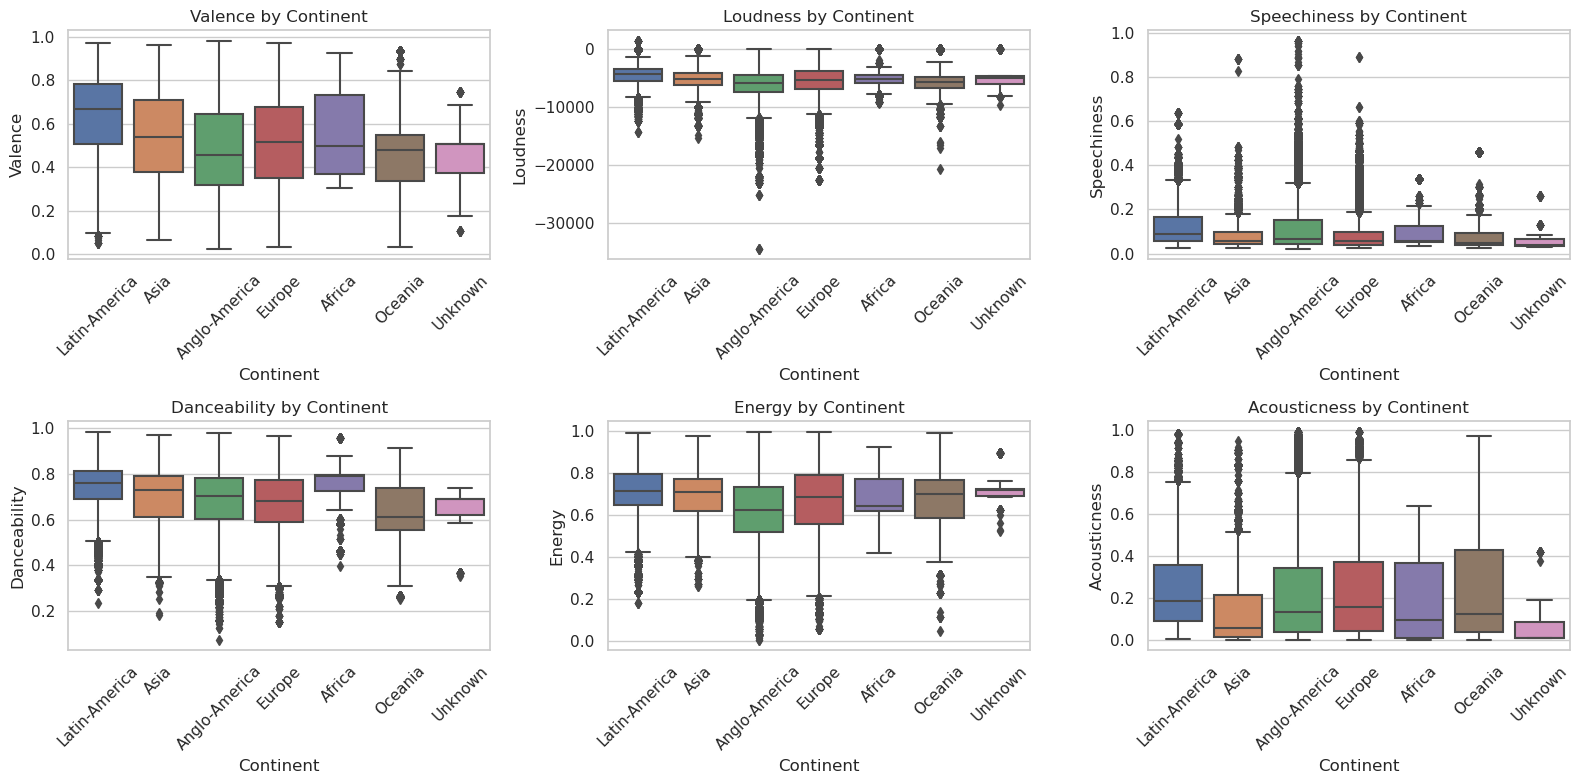

In [14]:

features = ['Valence', 'Loudness', 'Speechiness', 'Danceability', 'Energy', 'Acousticness']

plt.figure(figsize=(16, 8))
for feature in features:
    plt.subplot(2, 3, features.index(feature) + 1)
    sns.boxplot(x='Continent', y=feature, data=Data)
    plt.title(f'{feature} by Continent')
    plt.xlabel('Continent')
    plt.ylabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = Data[feature_columns[:-1]]
y = Data['Valence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")





Root Mean Squared Error: 0.18576521227179105
R-squared: 0.3096291970991508


In [17]:
features = ['Valence', 'Loudness', 'Speechiness', 'Danceability', 'Energy', 'Acousticness', 'Instrumentalness']


selected_features = Data[features]

correlation_matrix = selected_features.corr()

print(correlation_matrix)

                   Valence  Loudness  Speechiness  Danceability    Energy  \
Valence           1.000000  0.267136     0.006144      0.382444  0.401483   
Loudness          0.267136  1.000000    -0.025087      0.181186  0.534448   
Speechiness       0.006144 -0.025087     1.000000      0.182552 -0.015145   
Danceability      0.382444  0.181186     0.182552      1.000000  0.135812   
Energy            0.401483  0.534448    -0.015145      0.135812  1.000000   
Acousticness     -0.091603 -0.273602    -0.028816     -0.209641 -0.503092   
Instrumentalness -0.103414 -0.148965    -0.024589     -0.059155 -0.084711   

                  Acousticness  Instrumentalness  
Valence              -0.091603         -0.103414  
Loudness             -0.273602         -0.148965  
Speechiness          -0.028816         -0.024589  
Danceability         -0.209641         -0.059155  
Energy               -0.503092         -0.084711  
Acousticness          1.000000          0.044406  
Instrumentalness      0.04

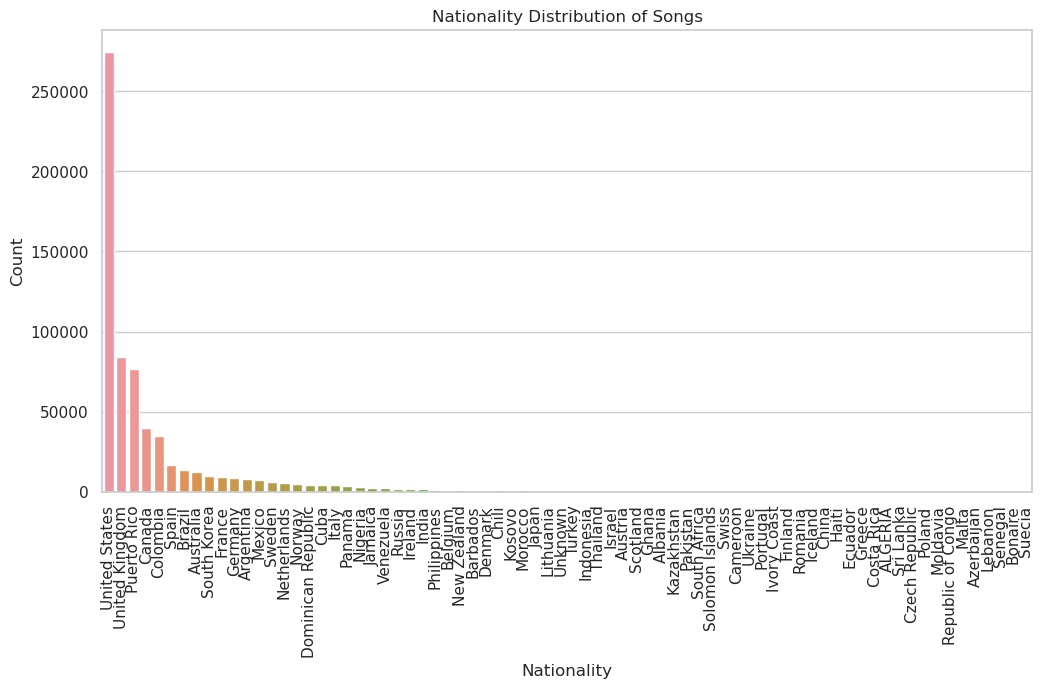

In [19]:
nationality_counts = Data['Nationality'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)
plt.title("Nationality Distribution of Songs")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

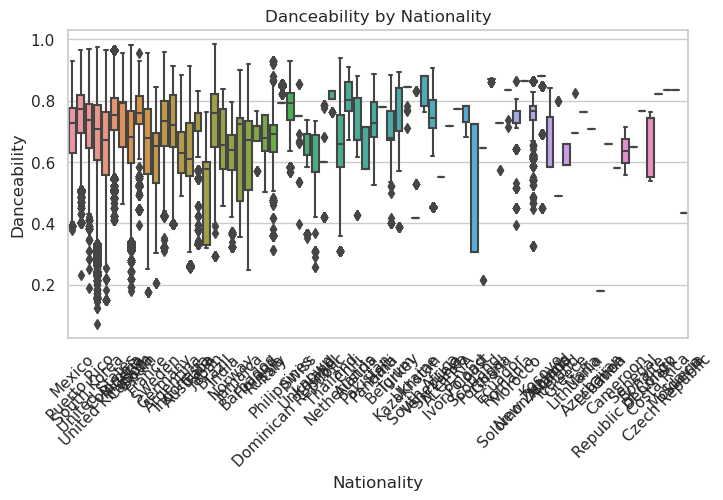

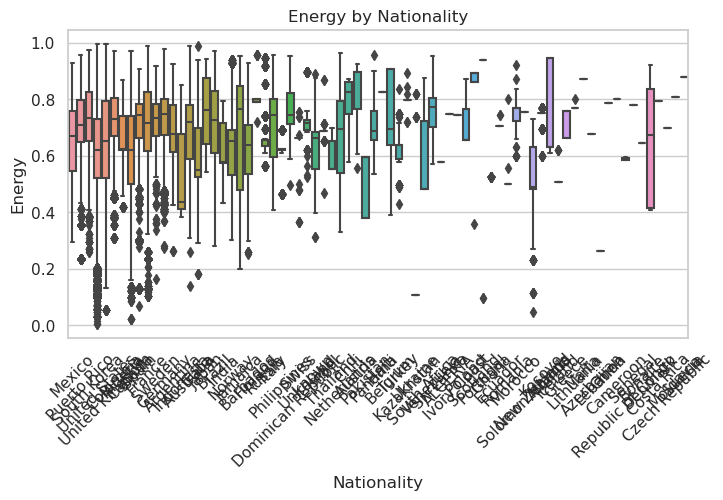

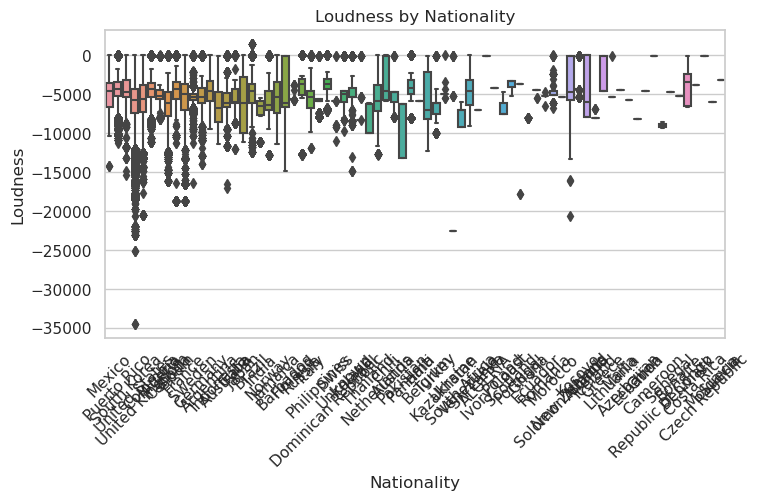

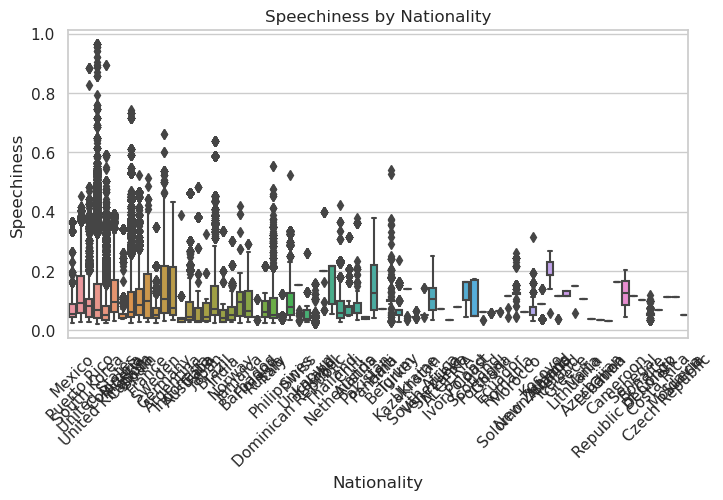

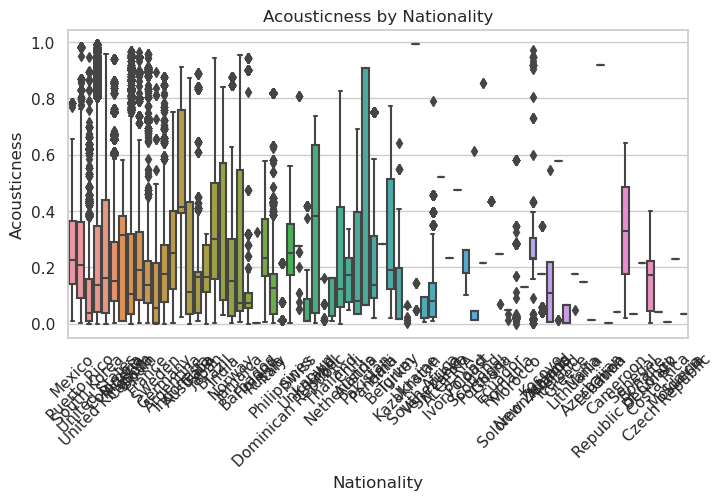

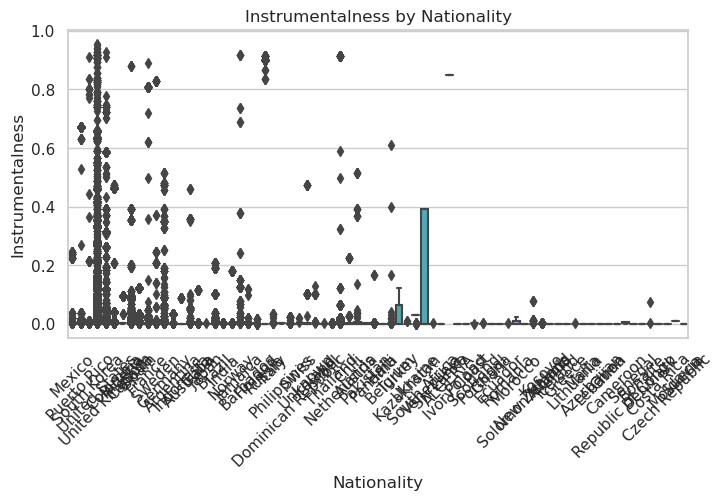

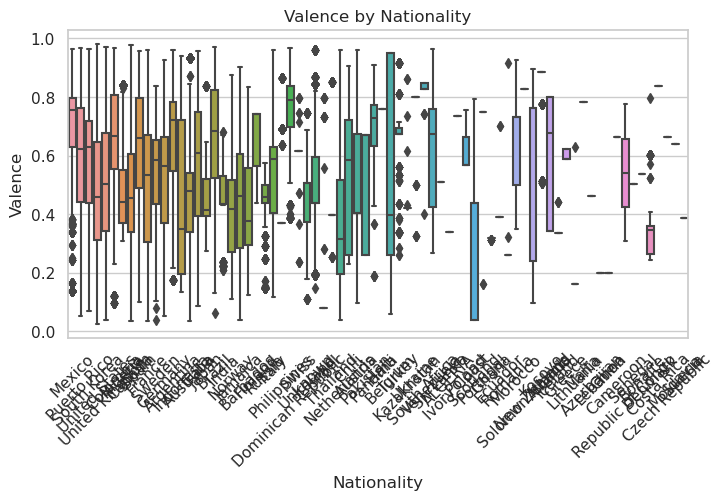

In [24]:
for feature in feature_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Nationality', y=feature, data=Data)
    plt.title(f'{feature} by Nationality')
    plt.xticks(rotation=45)
    plt.show()

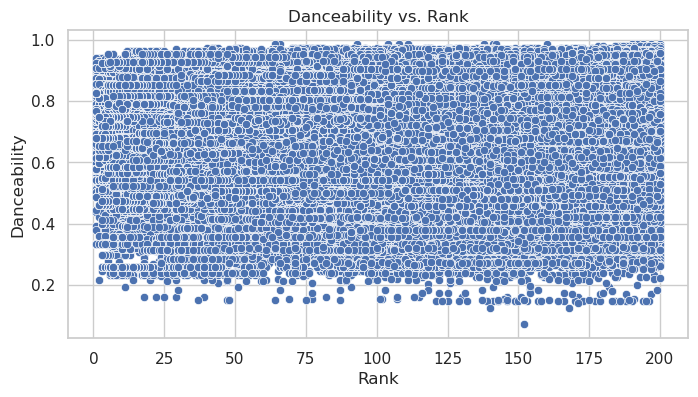

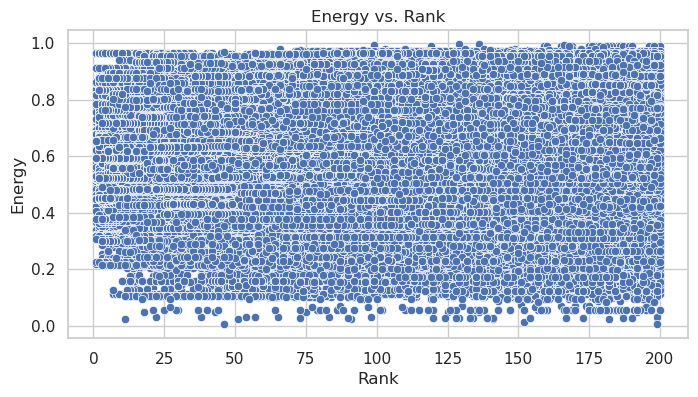

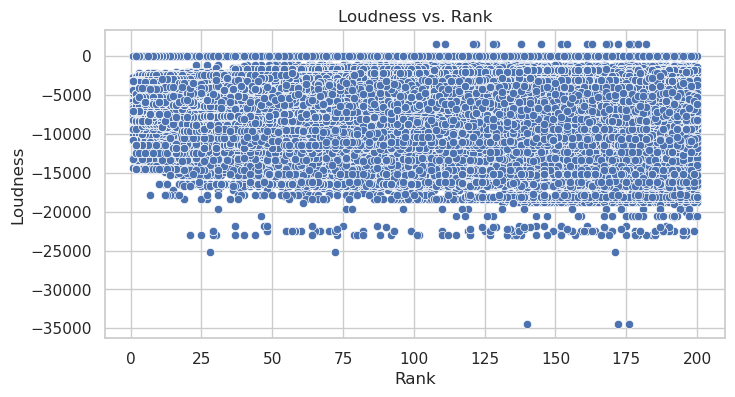

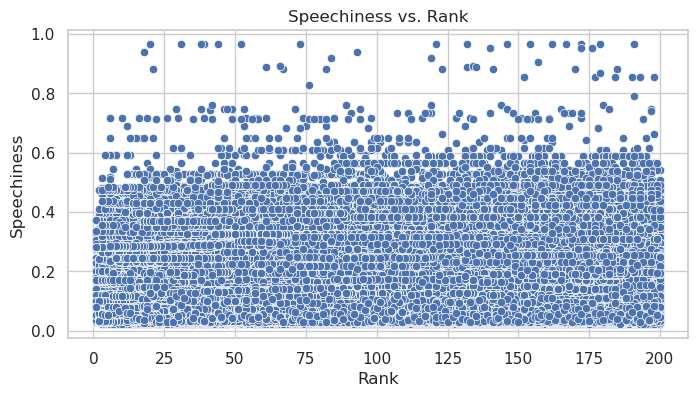

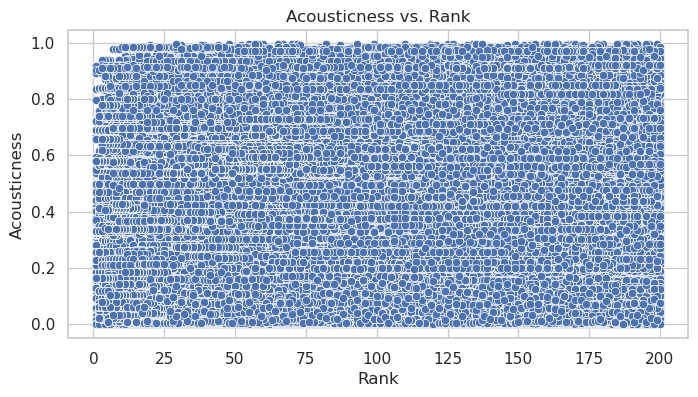

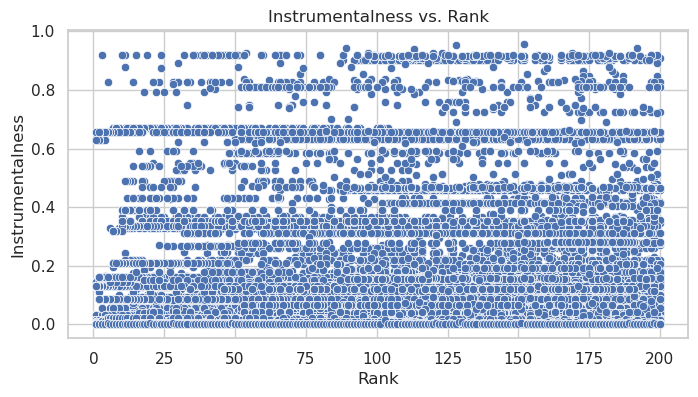

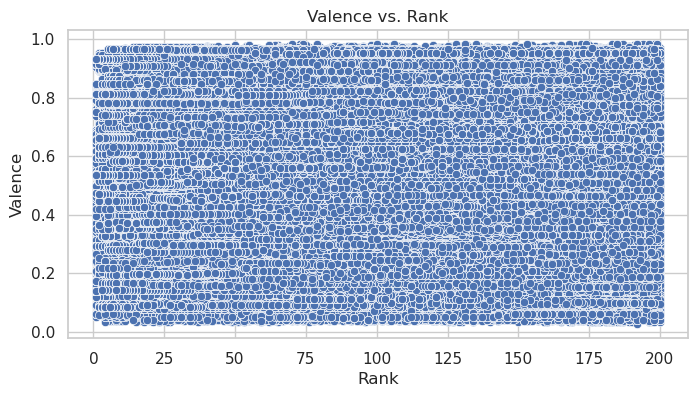

In [27]:
for feature in feature_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='Rank', y=feature, data=Data)
    plt.title(f'{feature} vs. Rank')
    plt.xlabel('Rank')
    plt.ylabel(feature)
    plt.show()

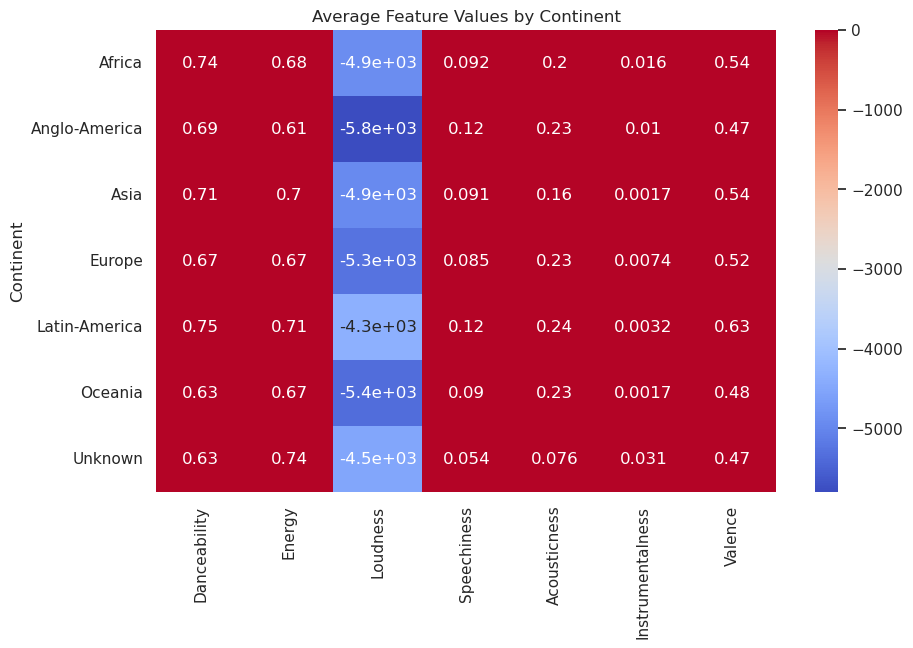

In [30]:
continent_means = Data.groupby('Continent')[feature_columns].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(continent_means, annot=True, cmap='coolwarm')
plt.title('Average Feature Values by Continent')
plt.show()